# Superdense Coding

## Indice

1) [Cos'è il Superdense Coding?](#what)  
2) [Let's Code](#code)

## Cos'è il Superdense Coding? <a name='what'> </a>

Il Superdense coding è un protocollo quantistico che ci permette di inviare due bit di informazione utilizzando un singolo qubit.  
Supponiamo che Alice ($A$) voglia inviare due bit a Bob ($B$). Innanzitutto $A$ e $B$ dovranno condividere uno stato Entangled di Bell 
$$|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B) $$
dove il primo qubit (denotato da $_A$) appartiene ad Alice ed il secondo a Bob.
Adesso dipendentemente dall'informazione che vuole mandare Alice applica una diversa porta quantistica e poi manda il suo qubit a Bob:

- Se $A$ vuole mandare 00 applico $I$ $\rightarrow$ $B : \frac{1}{\sqrt{2}}(|0\rangle_B \otimes |0\rangle_B + |1\rangle_B \otimes |1\rangle_B)$ 
- Se $A$ vuole mandare 10 applico $Z$ $\rightarrow$ $B : \frac{1}{\sqrt{2}}(|0\rangle_B \otimes |0\rangle_B - |1\rangle_B \otimes |1\rangle_B)$
- Se $A$ vuole mandare 01 applico $X$ $\rightarrow$ $B : \frac{1}{\sqrt{2}}(|1\rangle_B \otimes |0\rangle_B + |0\rangle_B \otimes |1\rangle_B)$
- Se $A$ vuole mandare 11 applico $XZ$ $\rightarrow$ $B : \frac{1}{\sqrt{2}}(|0\rangle_B \otimes |1\rangle_B - |1\rangle_B \otimes |0\rangle_B)$

Tutti questi quattro stati sono stati ortogonali di Bell, ovvero possono essere determinati con una sola misura. Se adesso Bob applica al suo stato una porta $CNOT$ e poi una porta $H$ otterrà l'informazione che Alice voleva inizialmente mandare:   

$$
\frac{1}{\sqrt{2}}(|0\rangle_B \otimes |0\rangle_B + |1\rangle_B \otimes |1\rangle_B) \xrightarrow{\text{CNOT}} \frac{1}{\sqrt{2}} (|0\rangle_B + |1\rangle_B)\otimes |0\rangle_B \xrightarrow{\text{H}} |00\rangle_B
$$

$$
\frac{1}{\sqrt{2}}(|0\rangle_B \otimes |0\rangle_B - |1\rangle_B \otimes |1\rangle_B) \xrightarrow{\text{CNOT}} \frac{1}{\sqrt{2}} (|0\rangle_B - |1\rangle_B)\otimes |0\rangle_B \xrightarrow{\text{H}} |10\rangle_B
$$

$$
\frac{1}{\sqrt{2}}(|1\rangle_B \otimes |0\rangle_B + |0\rangle_B \otimes |1\rangle_B) \xrightarrow{\text{CNOT}} \frac{1}{\sqrt{2}} (|1\rangle_B + |0\rangle_B)\otimes |1\rangle_B \xrightarrow{\text{H}} |01\rangle_B
$$

$$
\frac{1}{\sqrt{2}}(|0\rangle_B \otimes |1\rangle_B - |1\rangle_B \otimes |0\rangle_B) \xrightarrow{\text{CNOT}} \frac{1}{\sqrt{2}} (|0\rangle_B - |1\rangle_B)\otimes |1\rangle_B \xrightarrow{\text{H}} |11\rangle_B
$$

## Let's Code <a name='code'> </a>

In [1]:
##Usual imports
from qiskit import *

#initialization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

# import plot tools
from qiskit.tools.visualization import plot_histogram

Creiamo il circuito coi relativi registri. 

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

superdense = QuantumCircuit(qr, cr)

Creiamo lo stato Entangled di Bell applicando prima la porta $H$ e poi la porta $CNOT$ usando il primo qubit come guardia.

In [3]:
superdense.h(qr[0])
superdense.cx(qr[0], qr[1])

Adesso Alice deve decidere a seconda dell'informazione da inviare quali porte usare

In [4]:
print("Cosa vuoi inviare a Bob (00 o 01 o 10 o 11)")
while True:
    info = input()
    if info == '00' or info == '01' or info == '10' or info == '11': break

Cosa vuoi inviare a Bob (00 o 01 o 10 o 11)
01


In [5]:
superdense.barrier()
# For 01, apply $X$
if info == '01':
    superdense.x(qr[0])
# For 10, apply $Z$
elif info == '10':
    superdense.z(qr[0])
# For 11, apply $XZ$
elif info == '11':
    superdense.z(qr[0]) 
    superdense.x(qr[0])
# For 00, do nothing
superdense.barrier()

Una volta applicate le porte Alice manda il suo qubit a Bob. Quest'ultimo per decodificare l'informazione applicherà un $CNOT$ e poi una porta $H$. Dopodichè misuriamo il tutto.

In [6]:
superdense.cx(qr[0], qr[1])
superdense.h(qr[0])
superdense.measure(qr[0], cr[0])
superdense.measure(qr[1], cr[1])

Disegnamo il circuito per visualizzarlo meglio.

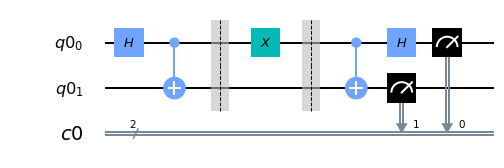

In [7]:
#draw the circuit
superdense.draw(output='mpl')

Utilizziamo il simulatore per vedere i risultati. Ci basta farlo andare solo con uno shot in quanto è un algoritmo deterministico.

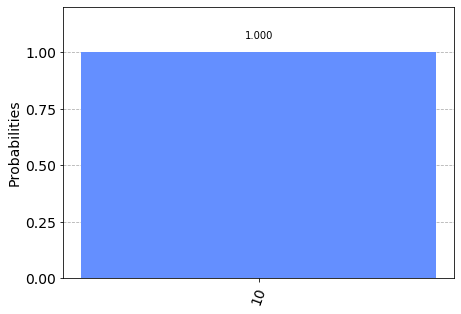

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1
results = execute(superdense, backend=backend, shots=shots).result()
data = results.get_counts()

        
plot_histogram(data)

## Bibliografia

[1] Note del corso di Computazione Quantistica a cura di Paolo Solinas.  
[2] M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000).  
[3] https://qiskit.org/  